Pizza sales analysis

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [9]:
df = pd.read_csv("C:/Users/shahn/Downloads/pizza_sales.csv")

Meta Data of Raw Data

In [23]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [24]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [25]:
print("Meta of dataset : " , df.shape)

Meta of dataset :  (48620, 12)


In [27]:
print("The Row of dataset : " , df.shape[0])

The Row of dataset :  48620


In [28]:
print("The Column of dataset : " , df.shape[1])

The Column of dataset :  12


In [29]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


Data types

In [31]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [32]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


KPI's

In [46]:
Total_revenue = df['total_price'].sum()
Total_pizza_sold = df['quantity'].sum()
Total_orders = df['order_id'].nunique()
Avg_order_value = Total_revenue / Total_orders
Avg_Pizza_per_order = Total_pizza_sold / Total_orders

print(f"""
      -------KPI's----------
Total_revenue : ${Total_revenue:,.2f}
Total_pizza_sold:   {Total_pizza_sold}
Total_orders :   {Total_orders}
Avg_order_value: ${Avg_order_value:,.2f}
Avg_Pizza_per_order : {Avg_Pizza_per_order:,.2f}""")





      -------KPI's----------
Total_revenue : $817,860.05
Total_pizza_sold:   49574
Total_orders :   21350
Avg_order_value: $38.31
Avg_Pizza_per_order : 2.32


Charts

Ingredient Analysis

In [51]:
ingredient = (
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns = {'index' : 'count' , 'pizza_ingredients' : 'ingredients'}))
print(ingredient.head(10))
    

         ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


Daily Trend - Total_orders

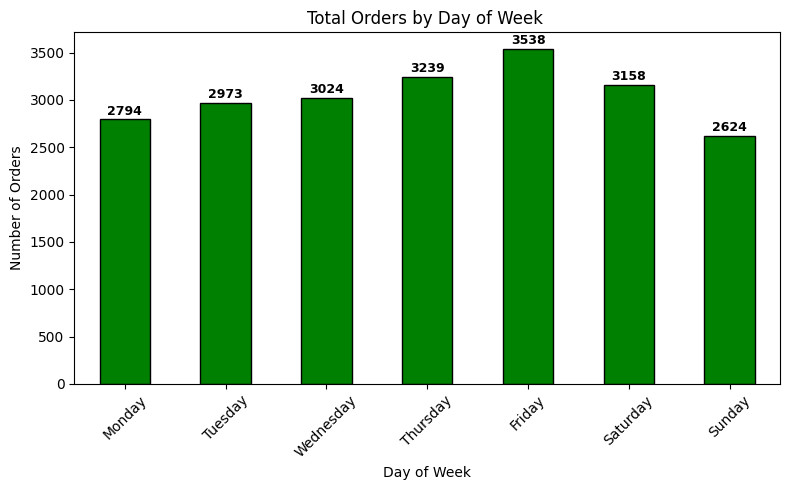

In [73]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)
df['day_name'] = df ['order_date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'],categories = weekday_order, ordered = True)
order_by_day = df.groupby ('day_name', observed = False)['order_id'].nunique()

ax = order_by_day.plot(kind = 'bar', figsize=(8,5), color ='green', edgecolor='black')
plt.title("Total Orders by Day of Week ")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation= 45)

for i, val in enumerate(order_by_day):
    plt.text(i, val + 20, str(val), ha = 'center', va = 'bottom', fontsize= 9, fontweight= 'bold')



plt.tight_layout()

plt.show()



Daily Trend - Total orders

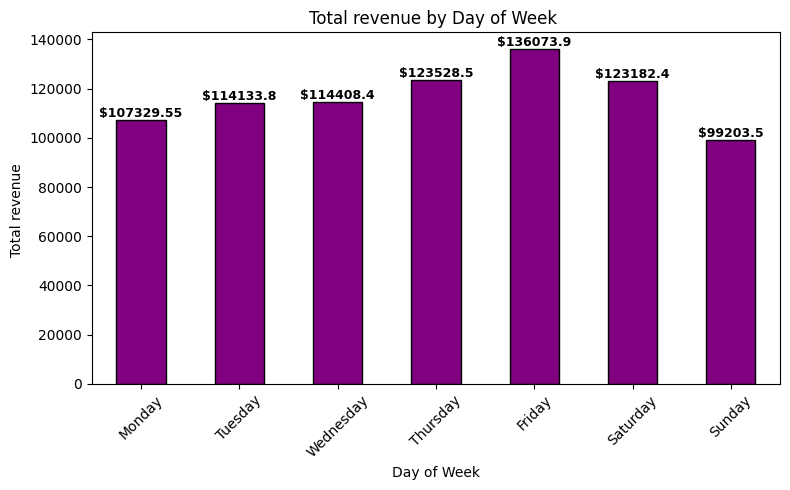

In [74]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)
df['day_name'] = df ['order_date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'],categories = weekday_order, ordered = True)
order_by_day = df.groupby ('day_name', observed = False)['total_price'].sum()

ax = order_by_day.plot(kind = 'bar', figsize=(8,5), color ='purple', edgecolor='black')
plt.title("Total revenue by Day of Week ")
plt.xlabel("Day of Week")
plt.ylabel("Total revenue ")
plt.xticks(rotation= 45)

for i, val in enumerate(order_by_day):
    plt.text(i, val + 20,f"${val}", ha = 'center', va = 'bottom', fontsize= 9, fontweight= 'bold')



plt.tight_layout()

plt.show()



Hourly Trend - Total revenue

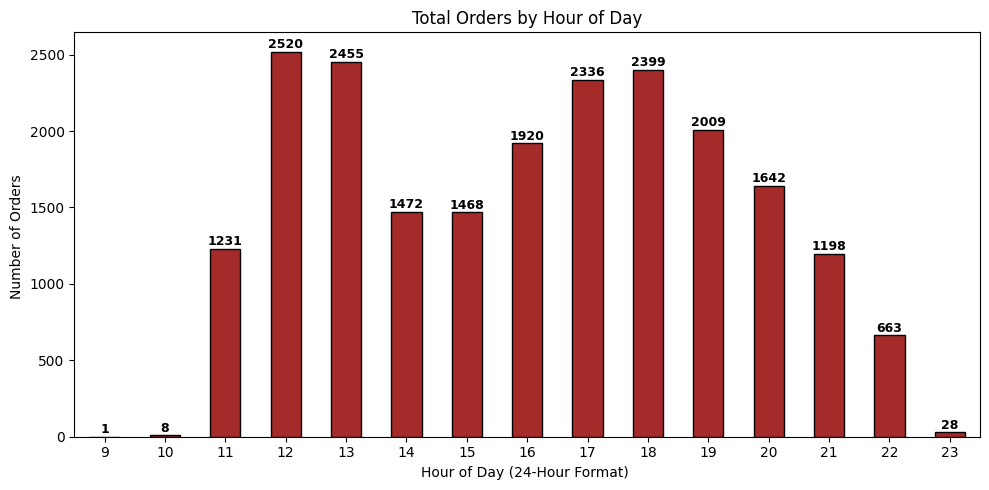

In [77]:
df['order_time'] = pd.to_datetime(df['order_time'], format= '%H:%M:%S')
df['day_hour'] = df ['order_time'].dt.hour
order_by_hour = df.groupby ('day_hour', observed = False)['order_id'].nunique()

ax = order_by_hour.plot(kind = 'bar', figsize=(10,5), color ='brown', edgecolor='black')
plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format) ")
plt.ylabel("Number of Orders ")
plt.xticks(rotation= 0)

for i, val in enumerate(order_by_hour):
    plt.text(i, val + 5,str(val), ha = 'center', va = 'bottom', fontsize= 9, fontweight= 'bold')



plt.tight_layout()

plt.show()



Montly Trend - Total orders

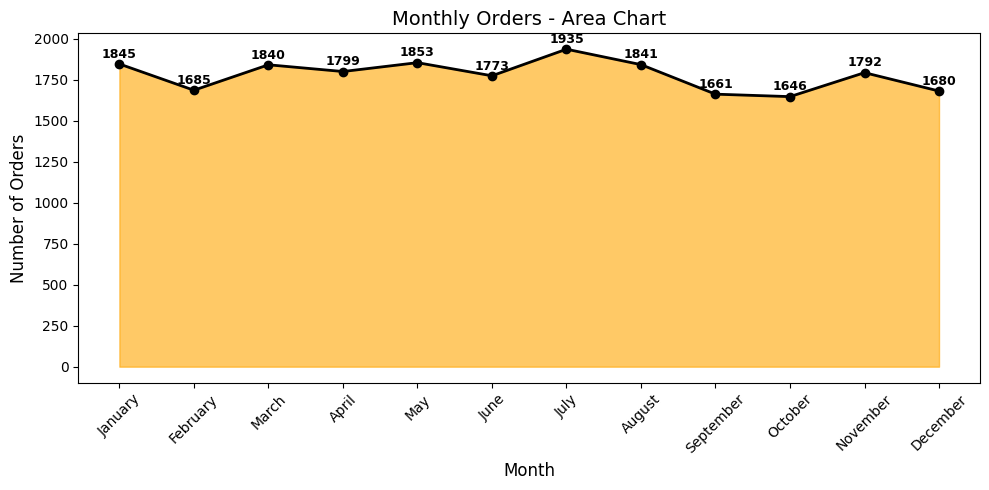

In [84]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)
df['month_name'] = df ['order_date'].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December']
df['month_name'] = pd.Categorical(df['month_name'],categories = month_order, ordered = True)
orders_by_month = df.groupby ('month_name', observed = False)['order_id'].nunique()

plt.figure(figsize= (10,5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color = 'orange', alpha = 0.6)
plt.plot(orders_by_month.index , orders_by_month.values, color = 'black', linewidth=2,marker='o')

for i, val in enumerate(orders_by_month):
    plt.text(i, val + 20,str(val), ha = 'center', va = 'bottom', fontsize= 9, fontweight= 'bold')

plt.title('Monthly Orders - Area Chart', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()

plt.show()

%of Sales by Category

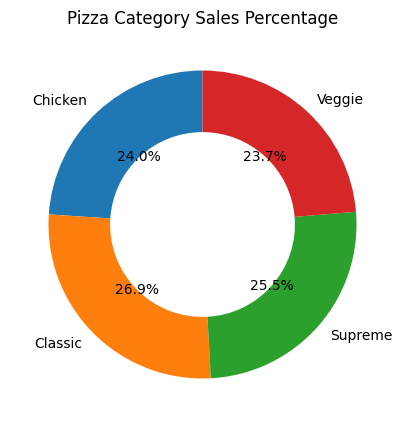

In [91]:

category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales/category_sales.sum() * 100

plt.figure(figsize=(5,5))
plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,

       wedgeprops={'width':0.4}
)
plt.title('Pizza Category Sales Percentage')
plt.show()
